In [1]:
import pandas as pd

In [17]:
import seaborn as sns

In [18]:
import numpy as np

In [9]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [10]:
data.dtypes
# object = string

age        int64
gender    object
split     object
final     object
dtype: object

In [11]:
# convert split and final to datetime
from datetime import datetime 

'''
converters : dict, optional
Dict of functions for converting values in certain columns. Keys can either
be integers or column labels.
'''
#pd.read_csv?

# def convert_str_to_time(s):
#     return datetime.strptime(s, '%H:%M:%S') 

# data = pd.read_csv('marathon-data.csv', converters= {'split': convert_str_to_time, 'final': convert_str_to_time})
# data.head()

'\nconverters : dict, optional\nDict of functions for converting values in certain columns. Keys can either\nbe integers or column labels.\n'

In [8]:
#data.dtypes

age                int64
gender            object
split     datetime64[ns]
final     datetime64[ns]
dtype: object

In [13]:
data.split = pd.to_timedelta(data.split)
data.final = pd.to_timedelta(data.final)
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [14]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [15]:
# add 2 new cols : convert split and final to secs
data['split_sec']= data['split'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0


In [16]:
data['final_sec']= data['final'].dt.total_seconds()
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


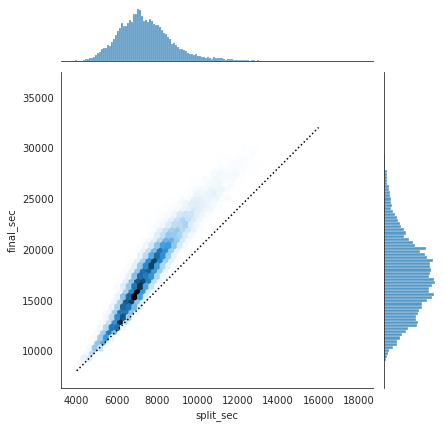

In [19]:
# joint plot
with sns.axes_style('white'):
    g = sns.jointplot(x='split_sec', y='final_sec', data=data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')